# Even study

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings, patsy
warnings.filterwarnings('ignore')
from linearmodels.panel  import PanelOLS as fe
import statsmodels.api as sm

dpi = 600

##  With difference in difference results

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/autor-jole2003.csv")
features = ['lnths', 'year_since_adoption', 'state', 'year', 'after']
data1 = data[features]
# for i in ['state', 'year', 'year_since_adoption']:
    # data1[i] = data1[i].astype('category')
data1 = data1.set_index(['state', 'year'])
data1.head(5)

fml = "lnths ~ C(year_since_adoption) - 1"
fml1 = 'lnths ~ after - 1'

y_data, x_data = patsy.dmatrices(fml, data = data1, return_type='dataframe')
y_data_1, x_data_1 = patsy.dmatrices(fml1, data = data1, return_type = 'dataframe')

x_data1 = x_data.filter(regex=r'0[^-1]')
nn =['C(year_since_adoption)[-9.0]', 'C(year_since_adoption)[-8.0]',
       'C(year_since_adoption)[-7.0]', 'C(year_since_adoption)[-6.0]',
       'C(year_since_adoption)[-5.0]', 'C(year_since_adoption)[-4.0]',
       'C(year_since_adoption)[-3.0]', 'C(year_since_adoption)[-2.0]',
        'C(year_since_adoption)[0.0]',
       'C(year_since_adoption)[1.0]', 'C(year_since_adoption)[2.0]',
       'C(year_since_adoption)[3.0]', 'C(year_since_adoption)[4.0]',
       'C(year_since_adoption)[5.0]', 'C(year_since_adoption)[6.0]',
       'C(year_since_adoption)[7.0]', 'C(year_since_adoption)[8.0]',
       'C(year_since_adoption)[9.0]', 'C(year_since_adoption)[10.0]',
       'C(year_since_adoption)[11.0]', 'C(year_since_adoption)[12.0]',
       'C(year_since_adoption)[13.0]', 'C(year_since_adoption)[14.0]',
       'C(year_since_adoption)[15.0]']

x_data2 = x_data1[nn]

mdl = fe(y_data, x_data2, time_effects=True, entity_effects=True)\
.fit( cov_type='clustered', cluster_entity = True )

mdl1 = fe(y_data_1, x_data_1['after[True]'], time_effects=True, entity_effects=True)\
.fit( cov_type='clustered', cluster_entity = True )

In [3]:
p = np.array(mdl.params) * 100
std = np.array(mdl.std_errors) * 100
u95 = p + 1.96 * std
l95 = p - 1.96 * std
# u90 = p + 1.64 * std
# l90 = p - 1.64 * std
df1 = pd.DataFrame(
    {
    "poin": p,
    'u95': u95,
    'l95': l95,    
    # 'u90': u90,    
    # 'l90': l90,
    'x': np.concatenate([np.arange(-9, -1, 1), np.arange(0, 16, 1)])
    }
)

df1.loc[len(df1.index)] = [0, 0, 0,  -1]
df1.sort_values('x', inplace=True)
# df11 = pd.melt(df1, id_vars = ['poin', 'x', 'u95', 'l95'], value_vars = ['u90', 'l90'])
df12 = pd.melt(df1, id_vars = ['poin', 'x'], value_vars = ['u95', 'l95'])
df12.head()

,poin,x,variable,value
0,1.095201,-9,u95,67.670811
1,3.087418,-8,u95,52.649471
2,2.952648,-7,u95,38.896585
3,1.520740,-6,u95,29.696308
4,-0.936925,-5,u95,23.286290


In [4]:
# -- boundary lines
dind = mdl1.params[0]*100
didse = mdl1.std_errors[0]*100

x_after = np.arange(-0, 16, 1)
x_befor = np.arange(-9, 0, 1)
y_bef = np.repeat(0, len(x_befor))
dind1 = np.where(x_after > -5, dind, 0)
upper = np.where(dind1 != 0, dind + 1.96 * didse, 0)
lower = np.where(dind1 != 0, dind - 1.96 * didse, 0)

Text(0, 0.5, 'Coefficient estimates & 95% CI')

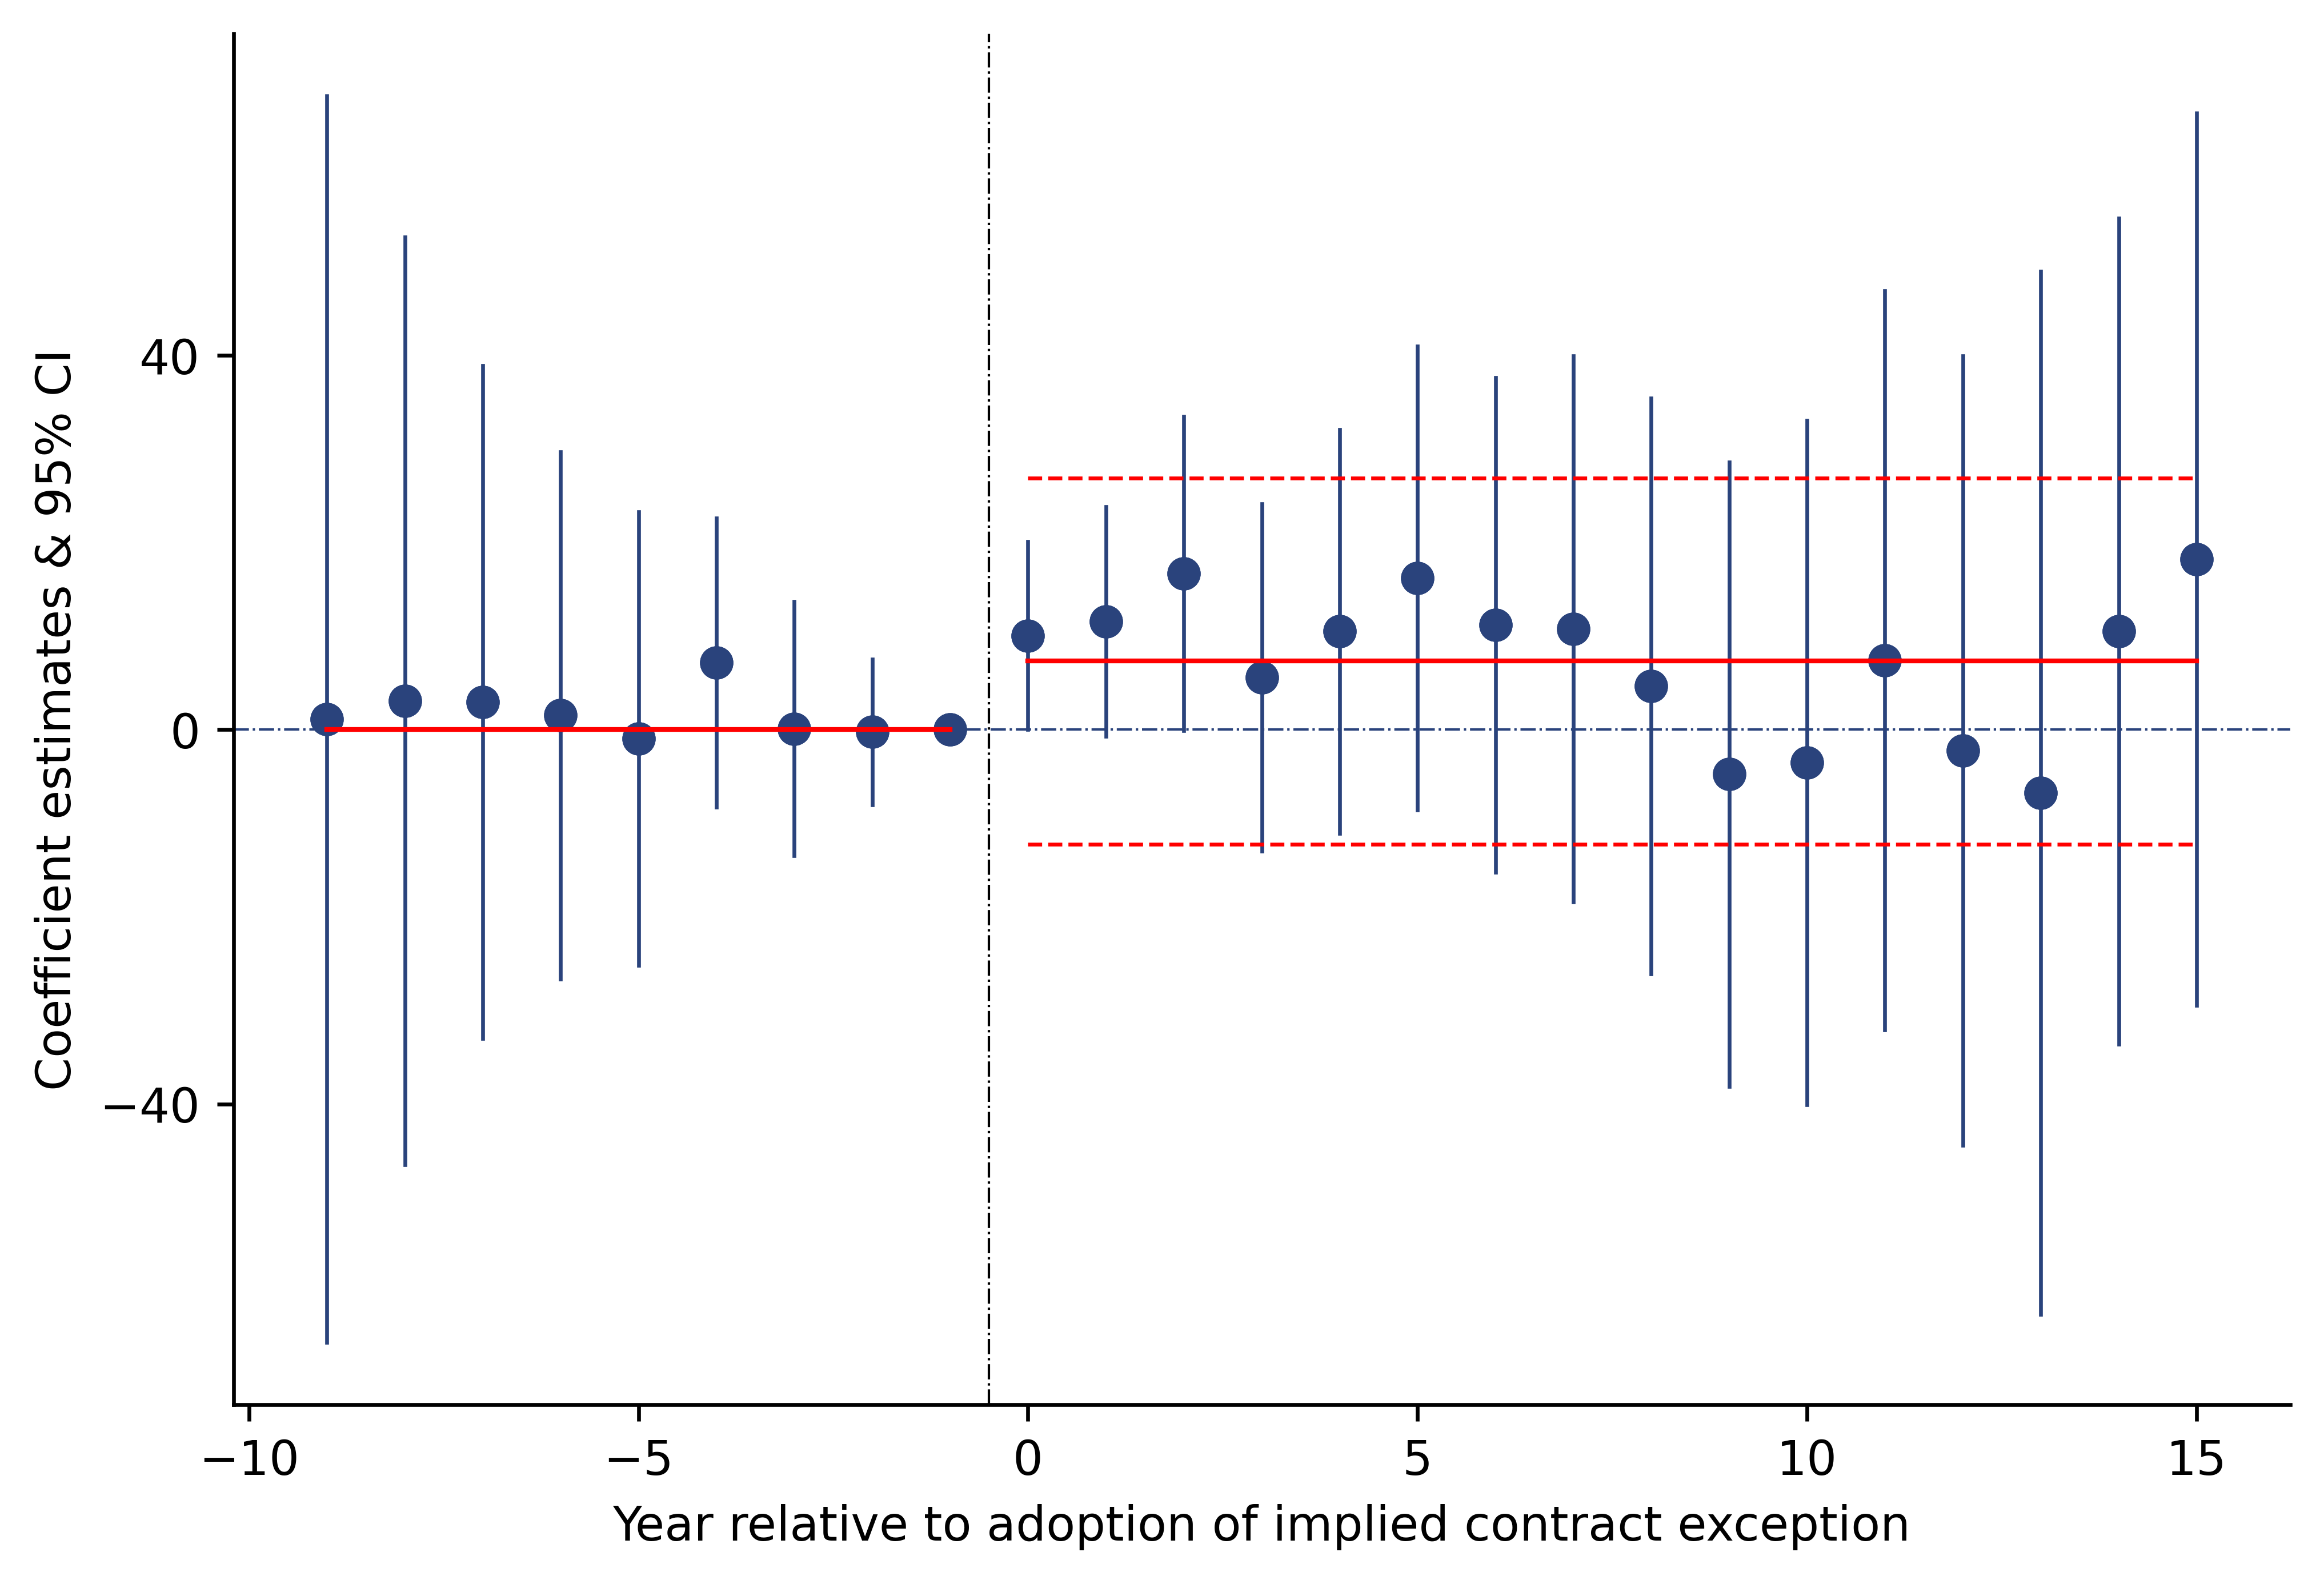

In [5]:
fig = plt.figure(dpi = dpi)
ax = fig.add_axes([.1, 1, 1, 1])

for i in np.unique(df12.x):
    ref_data = df12[df12.x == i]
    ax.plot('x', 'value', data = ref_data, color = "#2a437c", lw = .8)


ax.axhline(.0, lw = .5, color = '#2a437c', linestyle= "-.")

ax.scatter('x', 'poin', data = df12, color = "#2a437c")
ax.plot(x_after, dind1, lw = 1, color = 'red', linestyle = "-")
ax.plot(x_befor, y_bef, lw = 1, color = 'red', linestyle = "-")
ax.plot(x_after, upper, lw = .8, color = 'red', linestyle = "--")
ax.plot(x_after, lower, lw = .8, color = 'red', linestyle = "--")

ax.axvline(-.5, lw = .5, linestyle="-.", color = 'black')

omit = ['top', 'right']
ax.spines[omit].set_visible(False)

ax.set_xticks(np.arange(-10, 16, 5))
ax.set_yticks(np.arange(-40, 41, 40))
ax.set_xlabel("Year relative to adoption of implied contract exception")
ax.set_ylabel("Coefficient estimates & 95% CI")


## Ribbon for Confidence Intervals

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/autor-jole2003.csv")
features = ['lnths', 'year_since_adoption', 'state', 'year']
data1 = data[features]
# for i in ['state', 'year', 'year_since_adoption']:
    # data1[i] = data1[i].astype('category')
data1 = data1.set_index(['state', 'year'])
data1.head(5)

fml = "lnths ~ C(year_since_adoption) - 1"
y_data, x_data = patsy.dmatrices(fml, data = data1, return_type='dataframe')
x_data1 = x_data.filter(regex=r'0[^-1]')
nn =['C(year_since_adoption)[-9.0]', 'C(year_since_adoption)[-8.0]',
       'C(year_since_adoption)[-7.0]', 'C(year_since_adoption)[-6.0]',
       'C(year_since_adoption)[-5.0]', 'C(year_since_adoption)[-4.0]',
       'C(year_since_adoption)[-3.0]', 'C(year_since_adoption)[-2.0]',
        'C(year_since_adoption)[0.0]',
       'C(year_since_adoption)[1.0]', 'C(year_since_adoption)[2.0]',
       'C(year_since_adoption)[3.0]', 'C(year_since_adoption)[4.0]',
       'C(year_since_adoption)[5.0]', 'C(year_since_adoption)[6.0]',
       'C(year_since_adoption)[7.0]', 'C(year_since_adoption)[8.0]',
       'C(year_since_adoption)[9.0]', 'C(year_since_adoption)[10.0]',
       'C(year_since_adoption)[11.0]', 'C(year_since_adoption)[12.0]',
       'C(year_since_adoption)[13.0]', 'C(year_since_adoption)[14.0]',
       'C(year_since_adoption)[15.0]']
x_data2 = x_data1[nn]

mdl = fe(y_data, x_data2, time_effects=True, entity_effects=True)\
.fit( cov_type='clustered', cluster_entity = True )


In [7]:
p = np.array(mdl.params) * 100
std = np.array(mdl.std_errors) * 100
u95 = p + 1.96 * std
l95 = p - 1.96 * std
u90 = p + 1.64 * std
l90 = p - 1.64 * std
len(p), len(std), len(u95), len(u90)
df1 = pd.DataFrame(
    {
    "poin": p,
    'u95': u95,
    'l95': l95,    
    'u90': u90,    
    'l90': l90,
    'x': np.concatenate([np.arange(-9, -1, 1), np.arange(0, 16, 1)])
    }
)
df1.loc[len(df1.index)] = [0, 0, 0, 0, 0, -1]
df11 = pd.melt(df1, id_vars = ['poin', 'x', 'u95', 'l95'], value_vars = ['u90', 'l90'])
df12 = pd.melt(df11, id_vars = ['poin', 'x'], value_vars = ['u95', 'l95'])
df1.sort_values('x', inplace=True)

Text(0, 0.5, 'Conefficient estimates & Confidence Intervals')

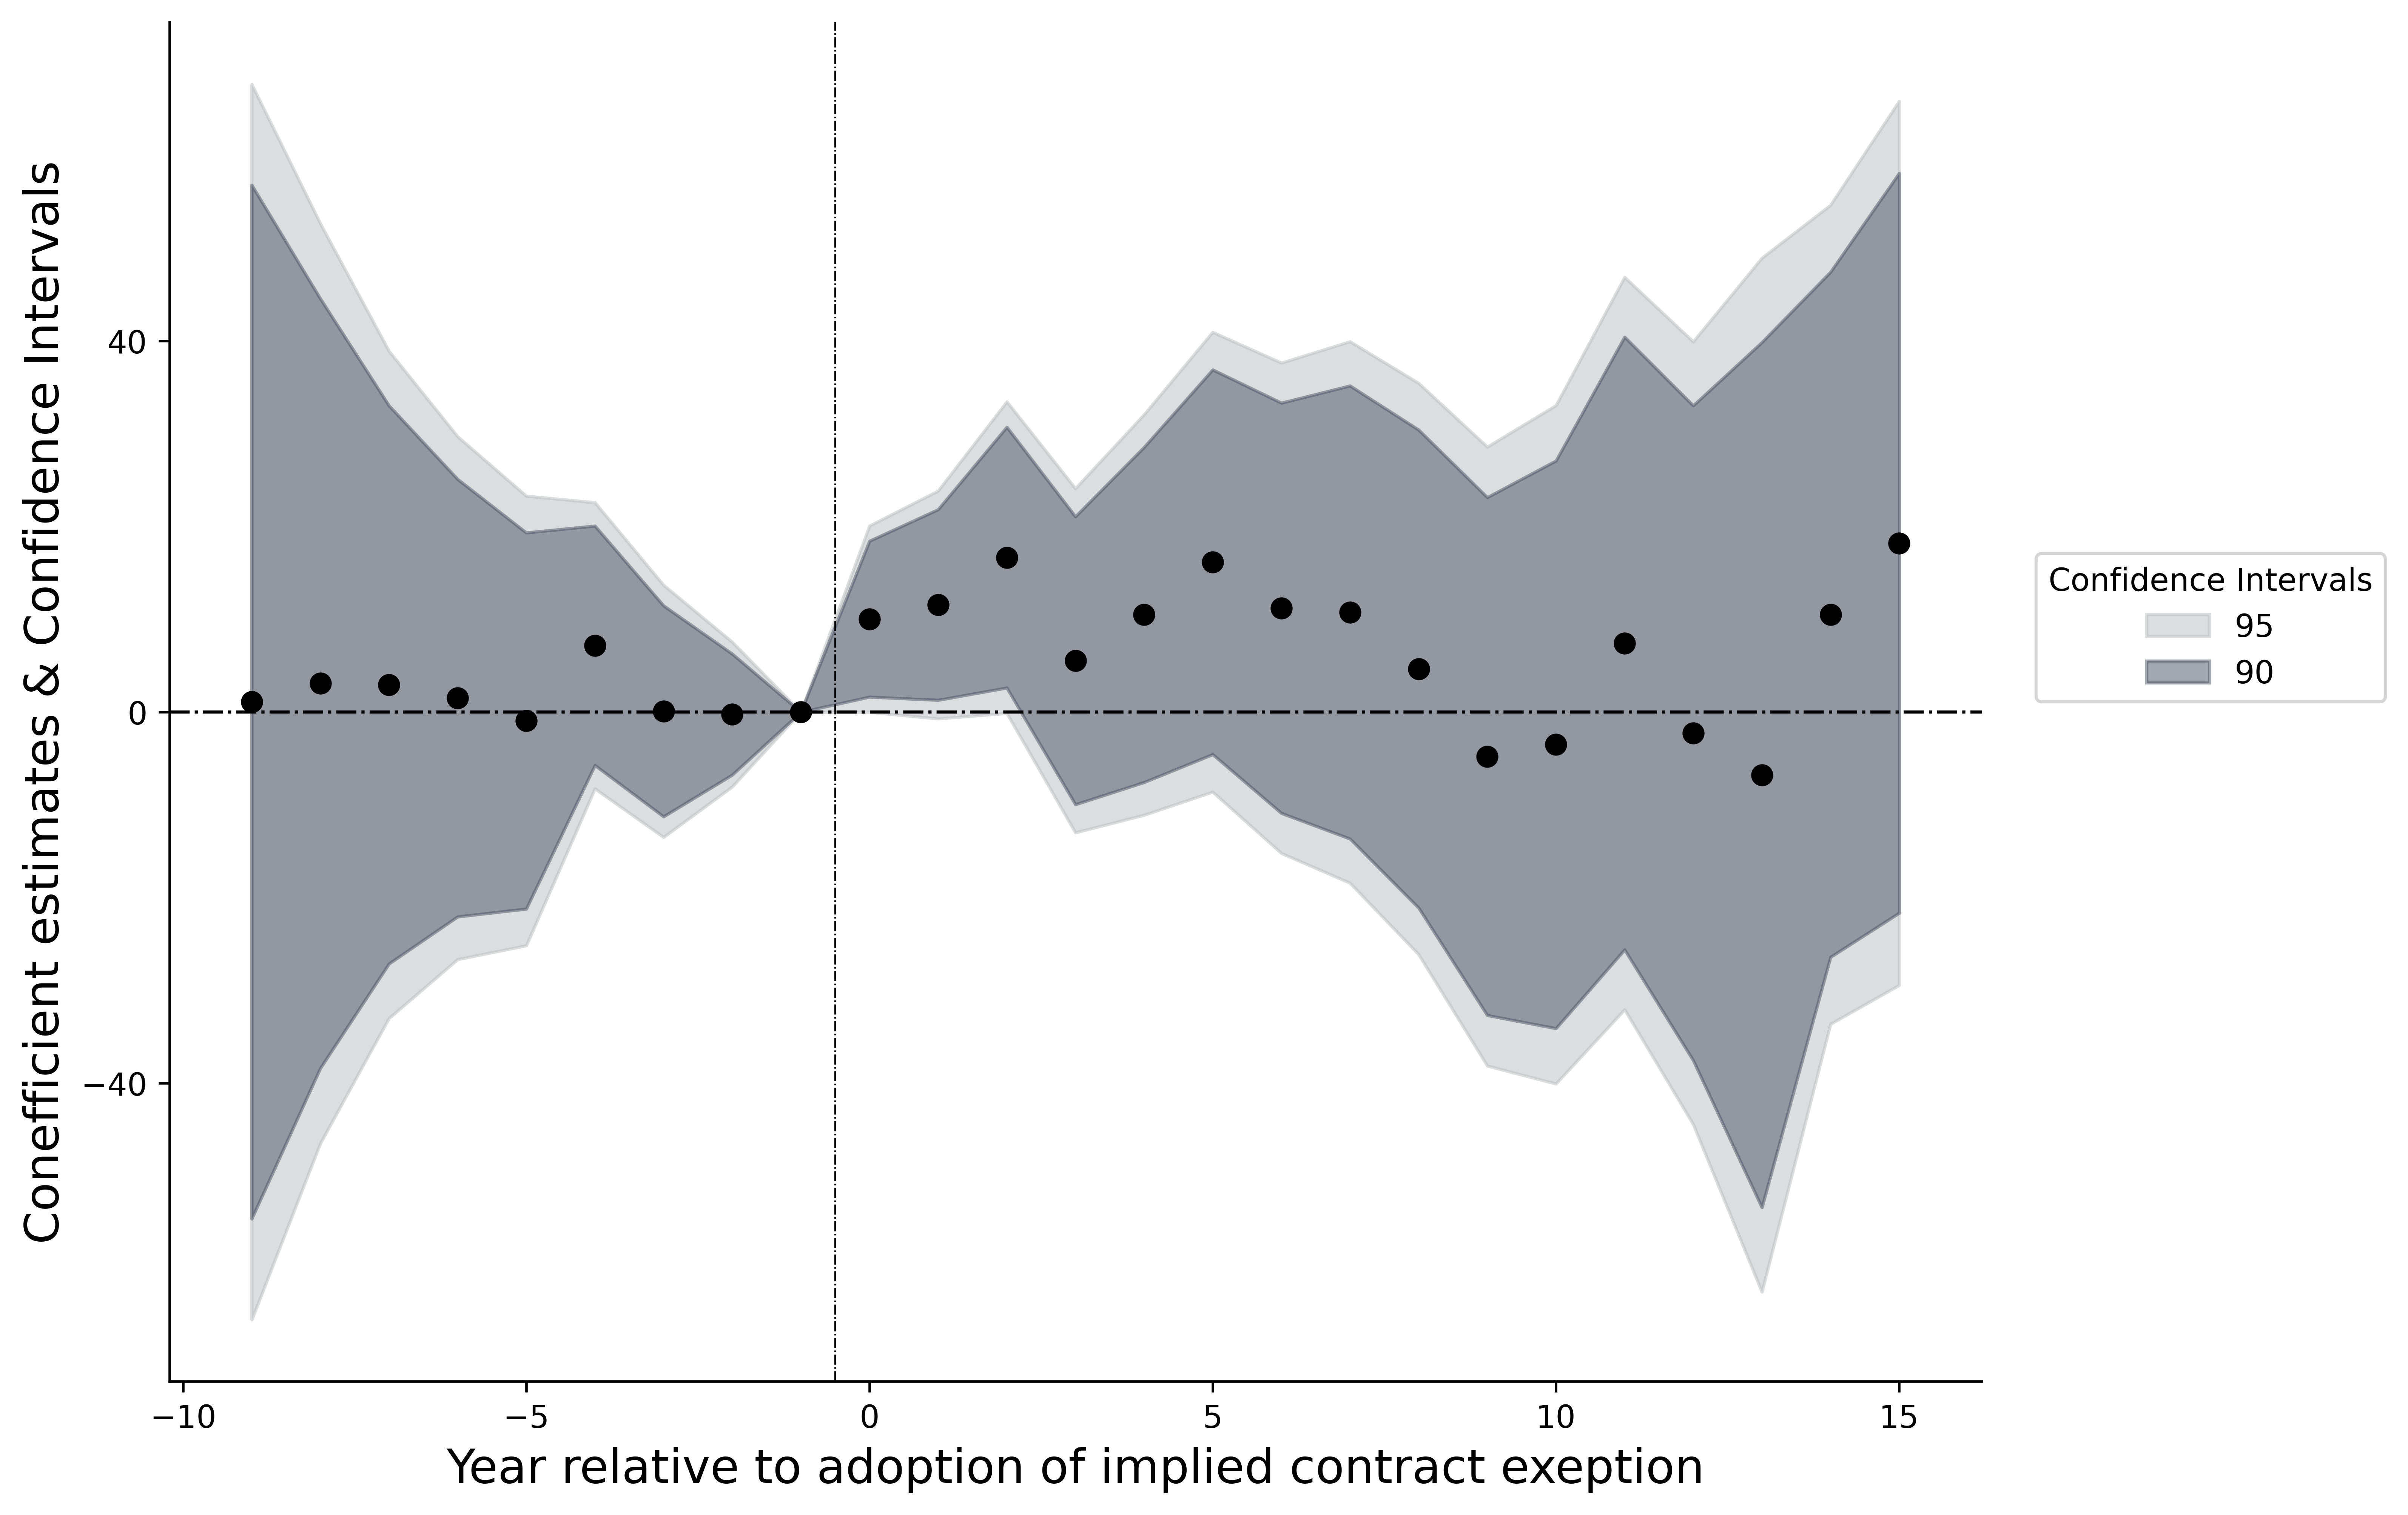

In [8]:
fig = plt.figure(figsize=(8, 6), dpi = dpi, facecolor = 'white')
ax = fig.add_axes([.1, 1, 1, 1])

alf = .5
omit = ['right', 'top']

ax.fill_between('x', 'l95', 'u95', data = df1 ,alpha = alf, label = "95", color = "#bbbcbf")
ax.fill_between('x', 'l90', 'u90', data = df1 ,alpha = alf, label = "90", color = "#4b5263")
ax.scatter("x", "poin", data = df1, color = "black", label = "")

ax.legend(title = "Confidence Intervals", loc = (1.03, .5))
ax.axvline(-.5, color = "black", lw = .5, linestyle = "-.")
ax.axhline(0 , color = "black", lw = 1 , linestyle = "-.")
ax.set_yticks(np.arange(-40, 41, 40))
ax.spines[omit].set_visible(False)
ax.set_xlabel("Year relative to adoption of implied contract exeption", size = 15)
ax.set_ylabel("Conefficient estimates & Confidence Intervals", size = 15)
# ax.
